ADVANCE MACHINE LEARNING

LAB-7

PRANSHU PARATE

202211063

OLD FAITHFUL DATASET

In [32]:
#importing packages
import sklearn
from sklearn import cluster
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
%matplotlib inline

In [34]:
#load the dataset
df=pd.read_csv("/content/faithful.csv")
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [35]:
#Remove unnamed coloumn from the dataset 
df = df.drop(['Unnamed: 0'], axis=1)

In [36]:
#print the dataframe
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [37]:
#dimensions of the dataframe
df.shape

(272, 2)

In [38]:
#Standardize the data
df_std = (df - df.mean()) / df.std()

In [39]:
df.columns=['eruptions','waiting']

Text(0, 0.5, 'Time of Eruption(minutes)')

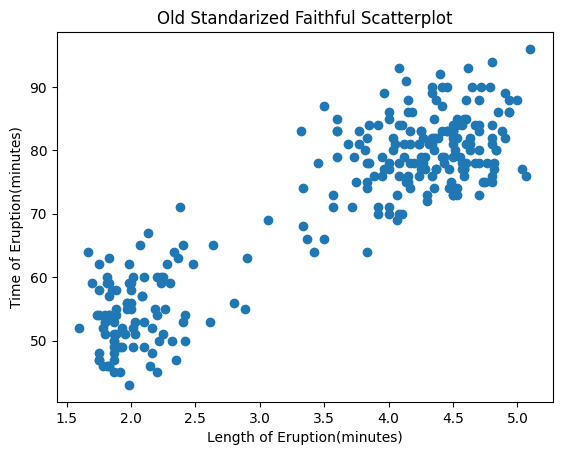

In [40]:
#Plot the data as a scatter plot
plt.scatter(df.eruptions,df.waiting)
plt.title('Old Standarized Faithful Scatterplot')
plt.xlabel('Length of Eruption(minutes)')
plt.ylabel('Time of Eruption(minutes)')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


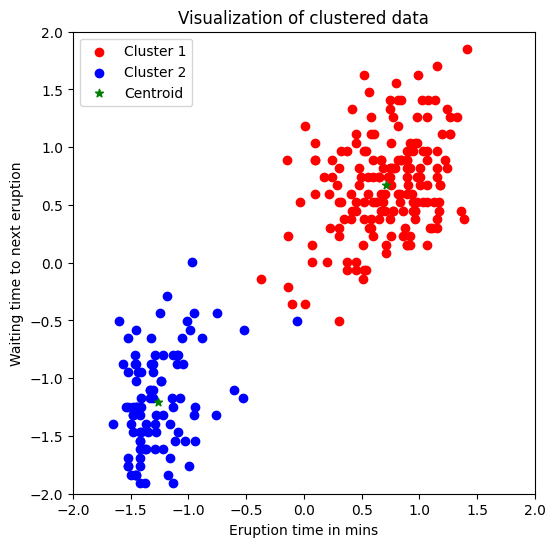

In [41]:
df = df[['eruptions', 'waiting']]
x = StandardScaler().fit_transform(df)
#kmeans
km = KMeans(n_clusters = 2, max_iter = 20, random_state = 20)
km.fit(x)
#Plot cluster
kmCenter = km.cluster_centers_
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(x[km.labels_ == 0,0], x[km.labels_ == 0,1], c = 'red', label = 'Cluster 1')
plt.scatter(x[km.labels_ == 1,0], x[km.labels_ == 1,1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmCenter[:, 0], kmCenter[:,1], c = 'g', label = 'Centroid', marker = '*')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data')
ax.set_aspect('equal')

Apply the k-means
algorithm on the data for k=2. Initialize the algorithm with 2 random centers. Plot the data with
cluster assignment for iteration nos. 1,5,10,15,20 till convergence. Show the 2 clusters in
different colors(Red and Blue) and also highlight the cluster centers in the plot.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


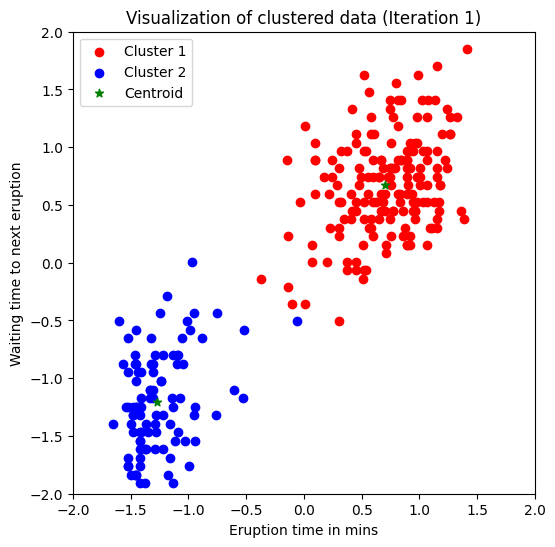

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


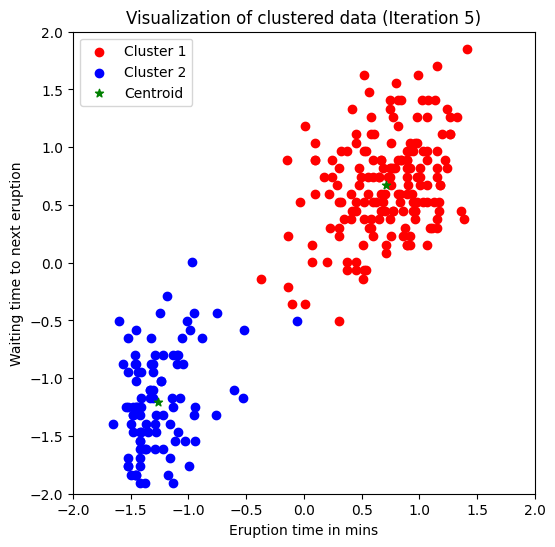

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


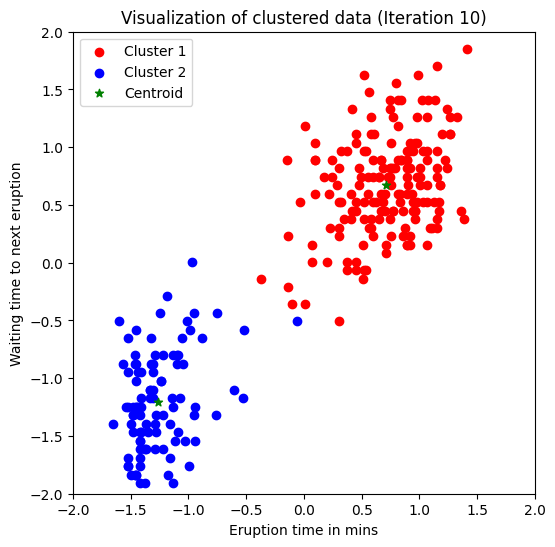

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


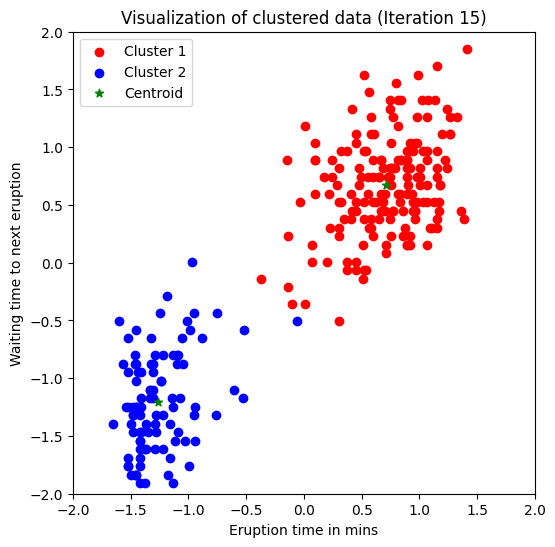

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


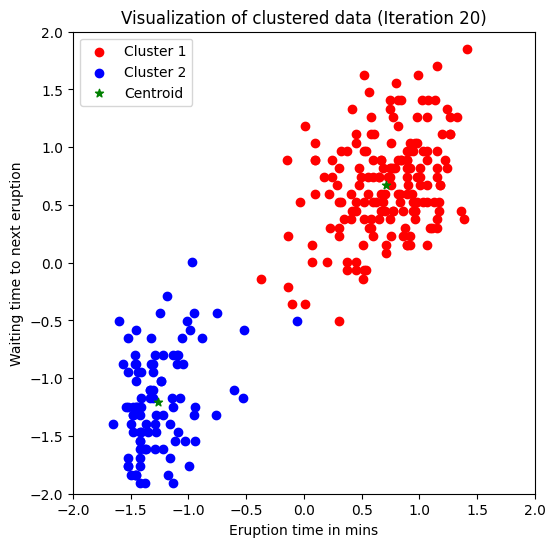

In [42]:
# Specify number of clusters and iterations
n_clusters = 2
max_iter = 20

# Plot clusters for each iteration
for i in [1, 5, 10, 15, 20]:
    # Fit KMeans model for specified number of iterations
    km = KMeans(n_clusters=n_clusters, max_iter=i, random_state=20)
    km.fit(x)
    
    # Get cluster centers
    km_center = km.cluster_centers_
    
    # Plot clusters and centroids
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x[km.labels_ == 0, 0], x[km.labels_ == 0, 1], c='red', label='Cluster 1')
    plt.scatter(x[km.labels_ == 1, 0], x[km.labels_ == 1, 1], c='blue', label='Cluster 2')
    plt.scatter(km_center[:, 0], km_center[:, 1], c='g', label='Centroid', marker='*')

    plt.legend()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('Eruption time in mins')
    plt.ylabel('Waiting time to next eruption')
    plt.title(f'Visualization of clustered data (Iteration {i})')
    ax.set_aspect('equal')
    
    plt.show()

Gaussian Mixture - Expectation Maximization

In [43]:
#Importing packages
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
#Load the dataset
faithful_df=pd.read_csv('/content/faithful.csv')
faithful_df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [45]:
#Delete the unnamed coloumn from dataset
del faithful_df['Unnamed: 0']
faithful_df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Now apply the EM algorithm for the Gaussian Mixture Model with k=2 on the dataset. Do not
use library functions for this and implement the EM algorithm from scratch.

In [46]:
def generateZ(mu,cov):
  x, y = np.meshgrid(np.linspace(1,6,1000),np.linspace(30,100,1000))
  xy = np.column_stack([x.flat, y.flat])
  Z = mvn.pdf(xy, mu, cov).reshape(x.shape)
  return x,y,Z

In [47]:
#Define Estimation Step
def Estep(df,mu,sigma,pi):
    X=df.to_numpy()
    K=sigma.shape[0]
    N=X.shape[0]
    gamma = np.zeros(shape=(N, K))
    
    for k in range(K):
        gamma[:, k] = mvn.pdf(X, mu[k], sigma[k]) * pi[k]
    
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    
    return gamma

In [48]:
#Define Maximization Step
def Mstep(df,gamma):
    X=df.to_numpy()
    N=X.shape[0]
    K=gamma.shape[1]
    
    pi = np.sum(gamma, axis=0)/np.sum(gamma)
    mu = X[np.random.choice(N, size=K, replace=False), :]
    sigma = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float128)
    
    for k in range(K):
        mu[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
        sigma[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mu[k, :]).reshape(N, X.shape[1], 1)@(X-mu[k, :]).reshape(N, 1, X.shape[1])), axis=0) /np.sum(gamma[:, k])
    
    return mu, sigma, pi

In [49]:
#Define log likelihood function
def logLikelihood(df,gamma,sigma,mu,pi):
    X = df.to_numpy()
    K = mu.shape[0]
    llh=0
    for k in range(K):
        llh += np.sum(gamma[:, k] * (np.log(mvn.pdf(X, mean=mu[k], cov=sigma[k])) + np.log(pi[k])))
    return llh

In [50]:
def EM(df, K, delta=0.001):
    X = df.to_numpy()
    N, D = X.shape
    mu = X[np.random.choice(N, size=K, replace=False), :]
    pi = np.ones(shape=(K), dtype=np.float128)/K
    sigma = np.zeros(shape=(K, D, D), dtype=np.float128)
    
    for d in range(D):
        sigma[:, d, d] = np.var(X[:, d])/10
        
    cur_llh = np.float128(1e9)
    prev_llh = 0.0
    iter = 0
    llh = []
    
    while(abs(cur_llh-prev_llh) > delta):
        gamma = Estep(df, mu, sigma, pi)
        mu, sigma, pi = Mstep(df, gamma)
        
        prev_llh = cur_llh
        cur_llh = logLikelihood(df, gamma, sigma, mu, pi)
        llh.append(cur_llh)
        
        labels = np.argmax(gamma, axis=1)
        
        iter=iter+1
        
        plt.figure()
        c=['blue','red','black']

        plt.scatter(faithful_df['eruptions'], faithful_df['waiting'],c=gamma[:,1],cmap='cool')
        for i in range(0,K):
            x,y,z=generateZ(mu[i],sigma[i])
            plt.contour(x, y, z,colors=c[i])
        plt.show()

    print('Number of iterations: {}'.format(iter))
    return mu, sigma, pi, gamma, labels, llh

Plot the data(initially in one color)
and the parameter (one standard-deviation contours for the two Gaussian components in two
different colors (Red and Blue)) after the first E-step and for 2, 5,10,15, 20 complete cycles of
the EM algorithm. Here you can color the points using a proportion of blue ink equal to the
posterior probability of having been generated from the blue component, and a corresponding
proportion of red ink given by the posterior probability of having been generated by the red
component. Thus, points that have a significant probability for belonging to either cluster appear purple.

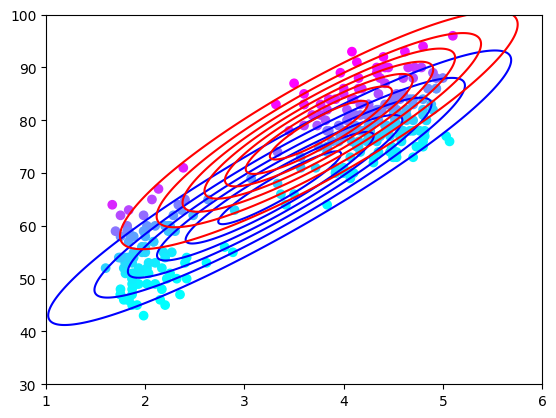

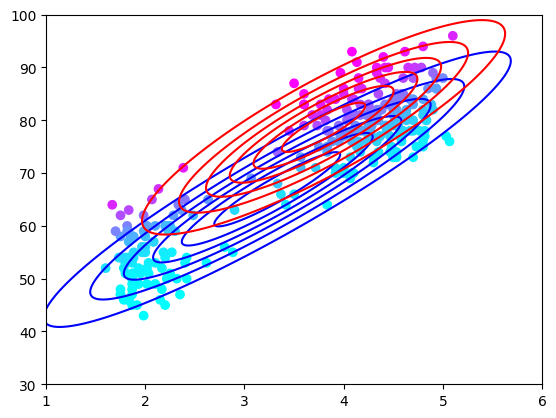

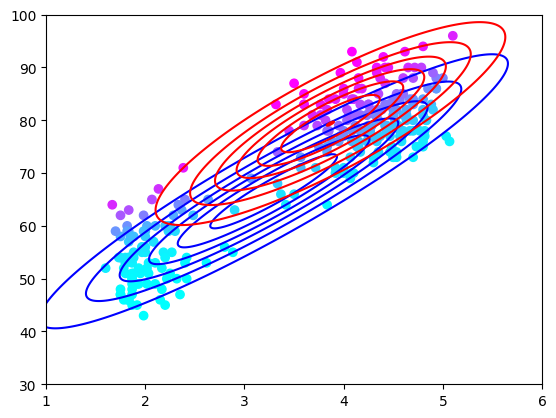

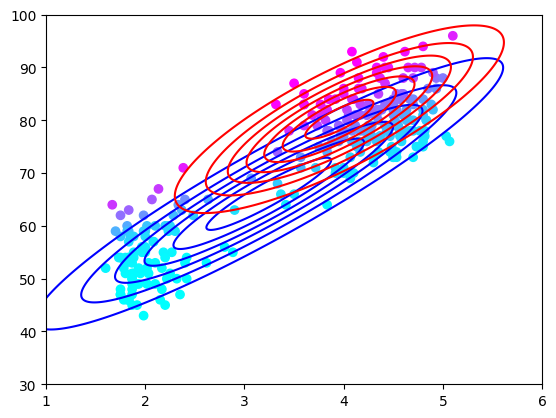

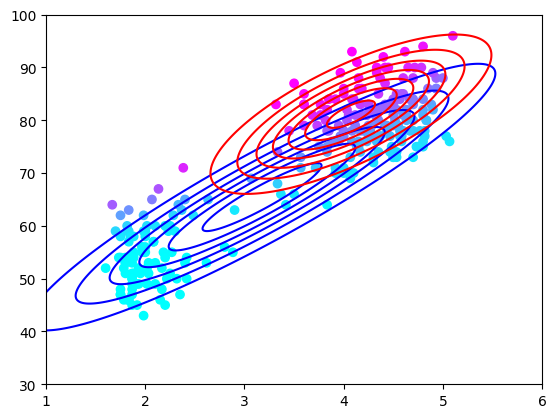

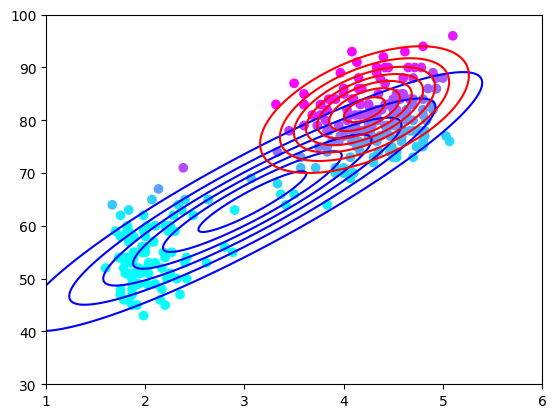

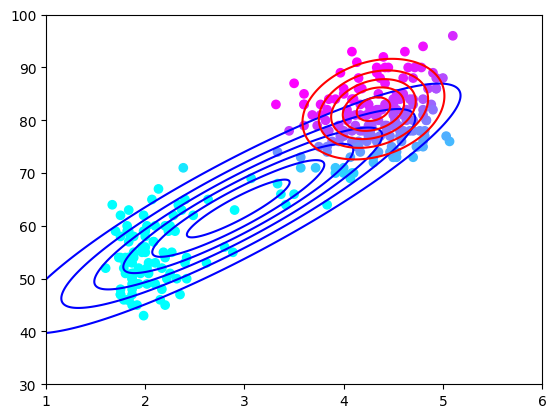

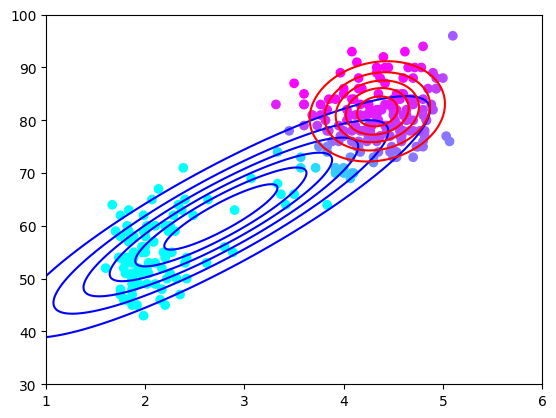

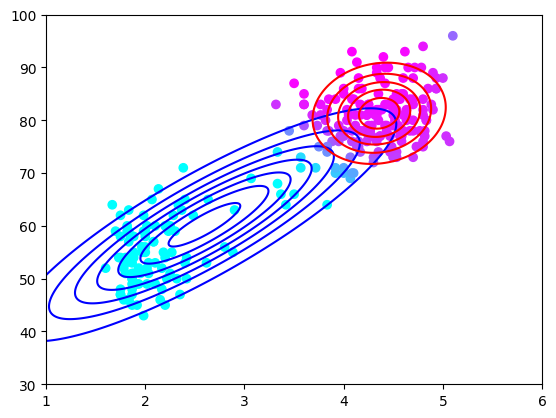

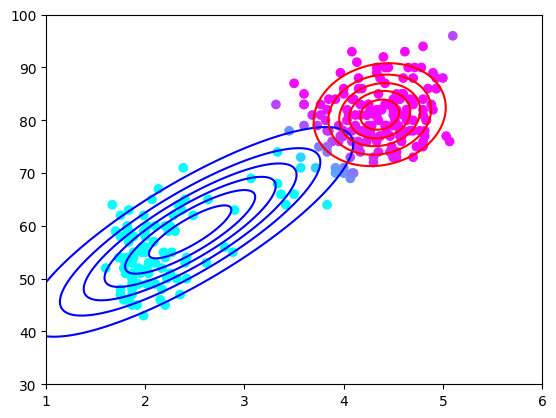

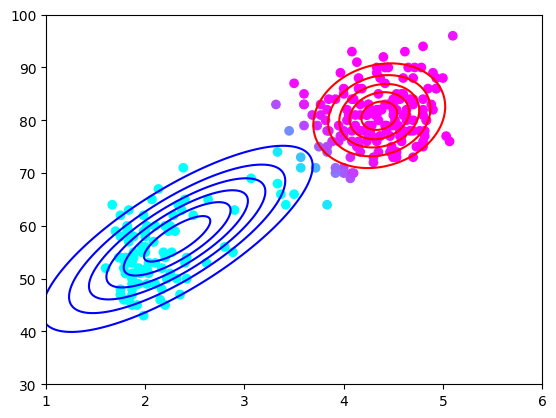

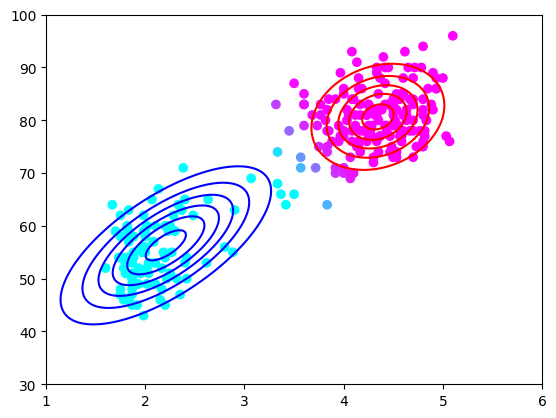

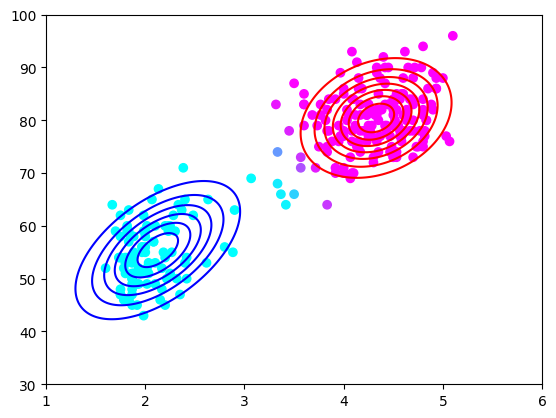

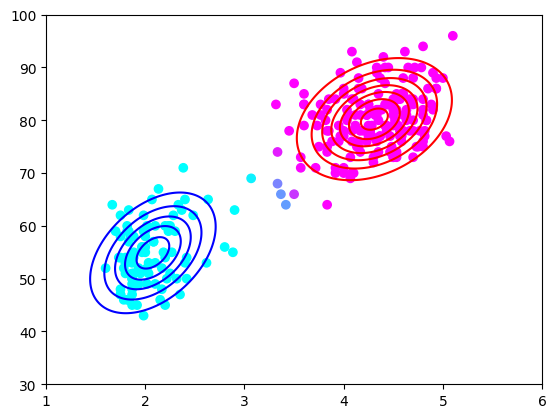

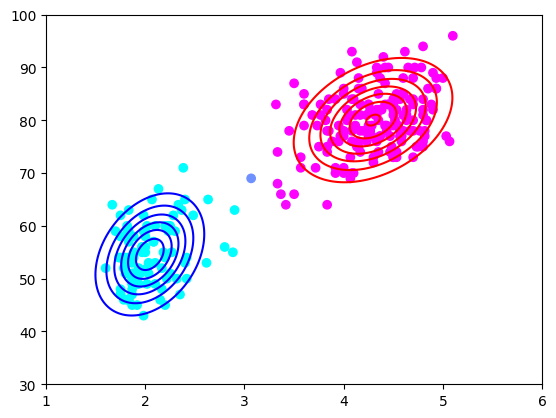

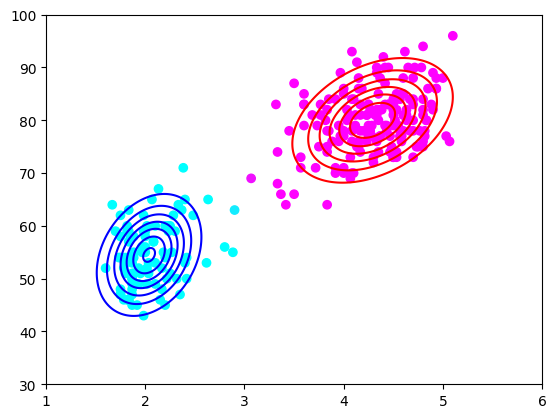

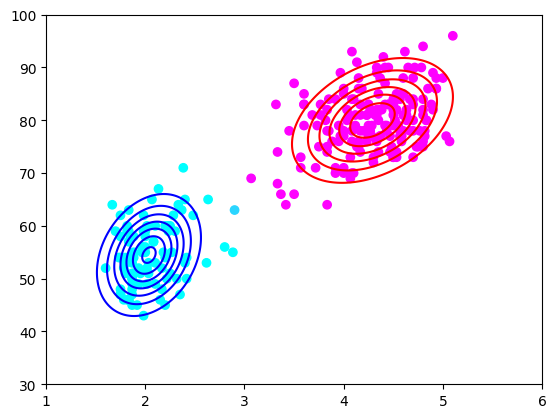

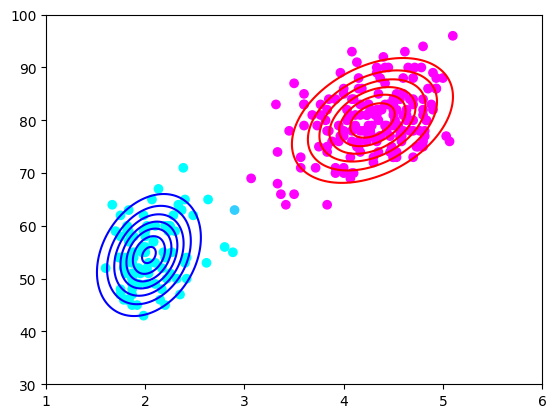

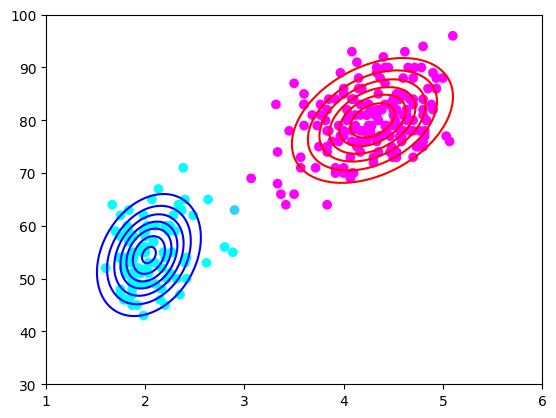

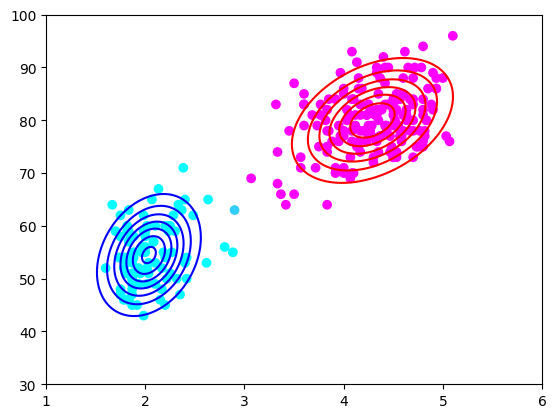

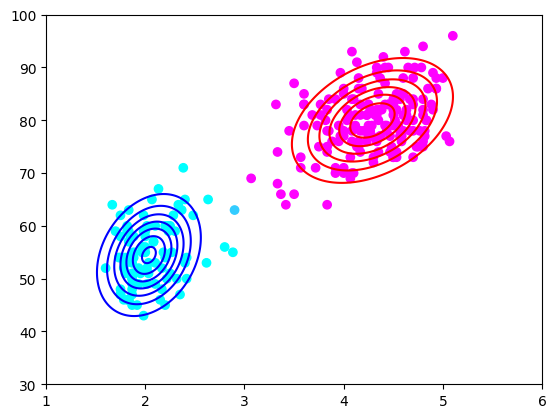

Number of iterations: 21


In [53]:
mu, sigma, pi, gamma, labels, llh = EM(faithful_df,2)

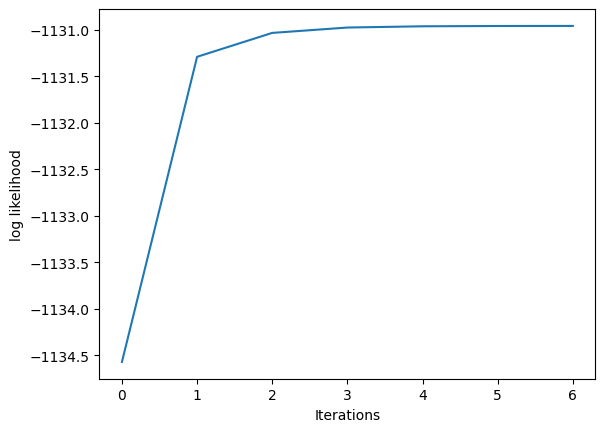

In [52]:
plt.plot(llh)
plt.xlabel('Iterations')
plt.ylabel('log likelihood')
plt.show()

We have observe that K-means algorithm iteratively moves the cluster centers to better represent the data. As the algorithm converges, we should see fewer changes in the cluster assignments of the data points, indicating that the algorithm has found a good representation of the data.

It is important to note that the K-means algorithm may not always find the optimal clusters, and the resulting clusters may depend on the initial cluster centers and the number of clusters chosen.